In [1]:
import pandas as pd
from scaling import standardize, normalize
from DBSCAN import findEps, dbscan

# Data fra 2021

In [2]:
df = pd.read_csv('../data/kaasa/kaasa_2021.csv')
df['date_time'] = pd.to_datetime(df['date_time']).dt.to_pydatetime() # convert from DateTime to Timestamp
df = df.drop(columns=['source_id', 'individual', 'owner_id', 'name', 'longitude', 'latitude', 'date_time', 'distance'])
df = standardize(df, ['velocity', 'temperature', 'altitude', 'sin_time', 'cos_time']) # standarize the data
df = normalize(df, ['velocity', 'temperature', 'altitude', 'sin_time', 'cos_time'], -1, 1) # normalize the data
df

,cos_time,sin_time,altitude,temperature,velocity
0,0.928621,0.371030,0.443829,-0.298137,-1.000000
1,0.142989,0.989724,0.378314,-0.285714,-0.992789
2,-0.785632,0.618694,0.372661,-0.155280,-0.998648
3,-0.928621,-0.371030,0.379604,-0.142857,-0.999099
4,-0.142989,-0.989724,0.386805,-0.149068,-0.998423
...,...,...,...,...,...
64342,-0.996673,-0.081504,0.088117,0.074534,-0.863437
64343,-0.941250,-0.337711,0.155072,0.149068,-0.884620
64344,-0.820775,-0.571251,0.201694,0.161491,-0.874479
64345,-0.648452,-0.761255,0.245005,0.198758,-0.900394


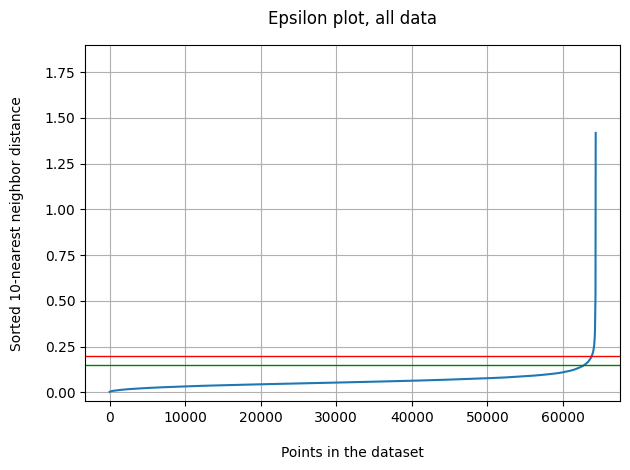

In [3]:
minPts = 2 * df.shape[-1] # minPts should be two times dimension of the data
findEps(df, minPts, fig=True)

In [21]:
print('Min points: ', minPts)
dbscan(df, 0.20, minPts, True)

Min points:  10
n features: 6
features: ['cos_time' 'sin_time' 'altitude' 'temperature' 'velocity' 'cluster']
Estimated no. of clusters: 21
Estimated no. of points: 63231
Estimated no. of noise points: 1116
    cluster  cos_time  sin_time  altitude  temperature  velocity
0        -1 -0.101563 -0.032646  0.024313     0.007207 -0.810221
1         0  0.002892  0.004177  0.075578    -0.088759 -0.971549
2         1 -0.919355  0.391706  0.053000    -0.191304 -0.600748
3         2 -0.975204  0.204402  0.275629    -0.201863 -0.682809
4         3  0.979812 -0.190729  0.463652    -0.801242 -0.995718
5         4 -0.259108  0.964594 -0.520525     0.453416 -0.963493
6         5 -0.555749  0.829536 -0.548940    -0.622812 -0.968246
7         6 -0.964365 -0.242617 -0.135336     0.711180 -0.994398
8         7  0.401951 -0.869372  0.005681     0.496366 -0.953170
9         8 -0.910838  0.404036 -0.100709     0.676242 -0.967592
10        9 -0.222645 -0.972201 -0.306450    -0.500239 -0.985092
11       10  

# For all data (2015-2021)

In [22]:
df2015 = pd.read_csv('../data/kaasa/kaasa_2015.csv', index_col=None, header=0)
df2016 = pd.read_csv('../data/kaasa/kaasa_2016.csv', index_col=None, header=0)
df2017 = pd.read_csv('../data/kaasa/kaasa_2017.csv', index_col=None, header=0)
df2018 = pd.read_csv('../data/kaasa/kaasa_2018.csv', index_col=None, header=0)
df2019 = pd.read_csv('../data/kaasa/kaasa_2019.csv', index_col=None, header=0)
df2020 = pd.read_csv('../data/kaasa/kaasa_2020.csv', index_col=None, header=0)
df2021 = pd.read_csv('../data/kaasa/kaasa_2021.csv', index_col=None, header=0)

files = [df2015, df2016, df2017, df2018, df2019, df2020, df2021]

df_tot = pd.concat(files, axis=0, ignore_index=True)

df_tot['date_time'] = pd.to_datetime(df_tot['date_time']).dt.to_pydatetime() # convert from DateTime to Timestamp
df_tot = df_tot.drop(columns=['source_id', 'individual', 'owner_id', 'name', 'longitude', 'latitude', 'date_time', 'distance'])
df_tot = standardize(df_tot, ['velocity', 'temperature', 'altitude', 'sin_time', 'cos_time']) # standarize the data
df_tot = normalize(df_tot, ['velocity', 'temperature', 'altitude', 'sin_time', 'cos_time'], -1, 1) # normalize the data

df_tot

,cos_time,sin_time,altitude,temperature,velocity
0,0.580348,0.814369,-0.821695,-0.603499,-1.000000
1,0.030466,0.999536,-0.821639,-0.580175,-1.000000
2,-0.413369,0.910563,-0.821657,-0.521866,-1.000000
3,-0.995445,0.095339,-0.801117,-0.294461,-0.999993
4,-0.580288,-0.814411,-0.824060,-0.218659,-0.999994
...,...,...,...,...,...
239495,-0.996673,-0.081504,0.057672,0.049563,-0.999914
239496,-0.941250,-0.337711,0.115680,0.119534,-0.999928
239497,-0.820775,-0.571251,0.156071,0.131195,-0.999921
239498,-0.648452,-0.761255,0.193594,0.166181,-0.999938


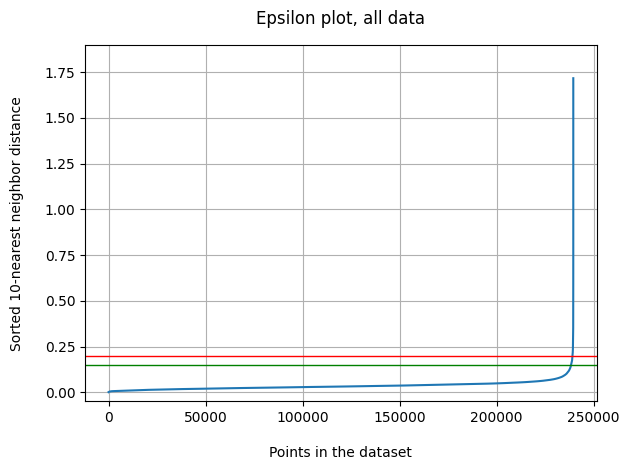

In [23]:
minPts = 2 * df_tot.shape[-1] # minPts should be two times dimension of the data
findEps(df_tot, minPts, fig=True)

In [26]:
dbscan(df_tot, 0.15, minPts, True)

n features: 6
features: ['cos_time' 'sin_time' 'altitude' 'temperature' 'velocity' 'cluster']
Estimated no. of clusters: 3
Estimated no. of points: 239066
Estimated no. of noise points: 434
   cluster  cos_time  sin_time  altitude  temperature  velocity
0       -1 -0.051301 -0.051912  0.236052    -0.014161 -0.621179
1        0  0.004309 -0.007327 -0.228069    -0.151256 -0.999248
2        1  0.774933 -0.629281  0.158298     0.113703 -0.599644


In [30]:
print('Min pts: ', minPts-1)
dbscan(df_tot, 0.15, minPts-1, True)

Min pts:  10
